In [17]:
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical

import numpy as np
import sys
import tensorflow as tf

In [18]:
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기
(x_train,y_train),(x_test,y_test) = mnist.load_data()

print(x_train.shape[0])
print(x_test.shape[0])

60000
10000


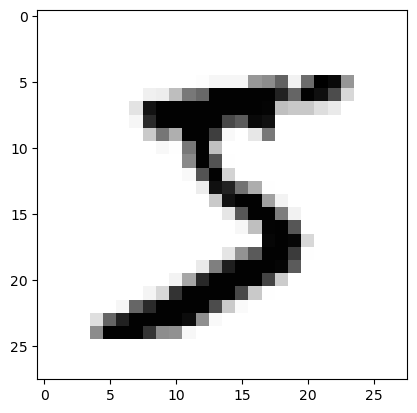

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap= 'Greys')
plt.show()

In [20]:
for x in x_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [23]:
# 28*28 2차원 데이터를 784개의 1차원 데이터로 바꿔주면 784개의 속성으로 이용가능하다
# 차원 변환 과정(2차원->1차원)

x_train = x_train.reshape(x_train.shape[0],784)

## 케라스는 데이터가 0~1 사이 값일때 최적의 성능으로 예측함
# 데이터 정규화 : 255 로 나눈다

x_train = x_train.astype('float64')  # 현재 정수형이므로 실수형으로 바꾼후 정규화 실시 
x_train = x_train / 255

# 테스트 셋에도 정규화 작업
x_test = x_test.reshape(x_test.shape[0],784).astype('float64')/255

In [25]:
# 클래스 값 확인
print('class: %d' % (y_train[0]))

# 현재 클래스를 0~9 정수값인 0 or 1인 벡터로 수정
# 바이너리화  ( 원핫인코딩)

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

class: 5


In [27]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

model = Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))

# 모델 실행 
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])



In [29]:
# 모델 저장 , 모델 최적화 단계에서 학습 자동 중단 설정
import os
model_DIR = './model/'
if not os.path.exists(model_DIR):
    os.mkdir(model_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath , monitor = 'val_loss',
                              verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),
                   epochs=30,batch_size=200,verbose=0,
                   callbacks = [early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.14808, saving model to ./model\01-0.1481.hdf5

Epoch 2: val_loss improved from 0.14808 to 0.10290, saving model to ./model\02-0.1029.hdf5

Epoch 3: val_loss improved from 0.10290 to 0.08981, saving model to ./model\03-0.0898.hdf5

Epoch 4: val_loss improved from 0.08981 to 0.07877, saving model to ./model\04-0.0788.hdf5

Epoch 5: val_loss improved from 0.07877 to 0.07281, saving model to ./model\05-0.0728.hdf5

Epoch 6: val_loss improved from 0.07281 to 0.06540, saving model to ./model\06-0.0654.hdf5

Epoch 7: val_loss improved from 0.06540 to 0.06441, saving model to ./model\07-0.0644.hdf5

Epoch 8: val_loss improved from 0.06441 to 0.06004, saving model to ./model\08-0.0600.hdf5

Epoch 9: val_loss did not improve from 0.06004

Epoch 10: val_loss did not improve from 0.06004

Epoch 11: val_loss did not improve from 0.06004

Epoch 12: val_loss did not improve from 0.06004

Epoch 13: val_loss did not improve from 0.06004

Epoch 14: val_loss did 

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

    tf.keras.layers.Conv2D(
        filters, 커널의 개수
        kernel_size,  커널의 크기
        strides=(1, 1), 원스텝씩 움직이며
        padding='valid',or 'same'   -  valid = 노 패딩.
        data_format=None,
        dilation_rate=(1, 1),
        groups=1,
        activation=None, 활성화 함수
        use_bias=True, 
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None,
        **kwargs
    )

    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        strides=None,
        padding='valid',
        data_format=None,
        **kwargs
    )